# Chapter 6 - Computational Algorithms in Linear Algebra

This notebook contains code accompanying Chapter 6 Computational Algorithms in Linear Algebra in *Practical Discrete Mathematics* by Ryan T. White and Archana Tikayat Ray.

## Matrices and Matrix Representations of Linear Systems

The code below stores matrices as `NumPy` arrays and prints specified entries of the matrices.

In [2]:
import numpy

# initialize matrices
A = numpy.array([[3, 2, 1], [9, 0, 1], [3, 4, 1]])
B = numpy.array([[1, 1, 2], [8, 4, 1], [0, 0, 3]])

# print the entry in the first row and first column of A
print(A[0,0])

# print the entry in the second row and third column of B
print(B[1,2])

3
1


### Example: Matrix Addition and Subtraction

In [4]:
# Add A and B
print(numpy.add(A,B))

# Subtract A and B
print(numpy.subtract(A,B))

[[ 4  3  3]
 [17  4  2]
 [ 3  4  4]]
[[ 2  1 -1]
 [ 1 -4  0]
 [ 3  4 -2]]


### Example: Scalar Multiplication and Transpose

In [3]:
# Multiply A by a scalar 5
print(numpy.multiply(5,A))

# Find the transpose of A
print(numpy.transpose(A))

[[15 10  5]
 [45  0  5]
 [15 20  5]]
[[3 9 3]
 [2 0 4]
 [1 1 1]]


### Example: Matrix Multiplication and Transpose

In [ ]:
# Multiply A and B
print(numpy.dot(A,B))

[[19 11 11]
 [ 9  9 21]
 [35 19 13]]


## Solving Large Linear Systems with `NumPy`

### Example: Solving $\mathbf{Ax}=\mathbf{b}$ for $\mathbf{x}$

In [ ]:
import numpy

# Create A and b matrices
A = numpy.array([[2, -6, 6], [2, 3, -1], [4, -3, -1]])
b = numpy.array([-8, 15, 19])

# Solve Ax = b
numpy.linalg.solve(A,b)


array([ 5.,  1., -2.])

### Example: Inconsistent and Dependent Systems with `NumPy`

In [ ]:
import numpy

# inconsistent system
A = numpy.array([[2, 1], [6, 3]])
b = numpy.array([3, 3])

print(numpy.linalg.solve(A,b))

LinAlgError: Singular matrix

Note that the code throws an error because the matrix $\mathbf{A}$ is singular since the system is inconsistent--i.e. there are no solutions.

In [ ]:
# dependent system
A = numpy.array([[2, 1], [6, 3]])
b = numpy.array([1, 3])

print(numpy.linalg.solve(A,b))

LinAlgError: Singular matrix

Note that the code throws an error because the matrix $\mathbf{A}$ is singular since the system is dependent--i.e. there are infinitely many solutions, as we can confirm below.

In [ ]:
A = numpy.array([[2, 1], [6, 3]])
print(numpy.linalg.det(A))

0.0


### Example: 10-by-10 Linear System (with `NumPy`)

In [6]:
import numpy

numpy.random.seed(1)

# Create A and b matrices with random
A = 10*numpy.random.rand(10,10)-5
b = 10*numpy.random.rand(10)-5

# Solve Ax = b
solution = numpy.linalg.solve(A,b)
print(solution)

# To verify the solution works, show Ax - b is near 0
sum(abs(numpy.dot(A,solution) - b))

[ 0.09118027 -1.51451319 -2.48186344 -2.94076307  0.07912968  2.76425416
  2.48851394 -0.30974375 -1.97943716  0.75619575]


2.375877272697835e-14

Write python code in google colab for the following. You are allowed to use any GenAI to guide you.For each question, you may use different image.Load any creative common image from wikipedia. Enlarge the image double of its size.
Transpose the image 90 degree
https://vignette.wikia.nocookie.net/gameofthrones/images/2/25/707_Daenerys_Profil.jpg/revision/latest?cb=20170829215522&path-prefix=de  remove the background of the image. ONLY maintain the character
Find 2 creative common images online. Combine these 2 images side by side vertically. Export it as Jpg
Change the image colour to gray tone.
Post the Google colab into your github/ practical -discrete-mathematics repository. Submit the github link in current webinar chat room

https://upload.wikimedia.org/wikipedia/commons/thumb/6/68/Chou_Tzuyu_240906.jpg/330px-Chou_Tzuyu_240906.jpg

https://zh.wikipedia.org/wiki/File:Chou_Tzuyu_240906.jpg

In [35]:
!pip install opencv-python-headless pillow numpy

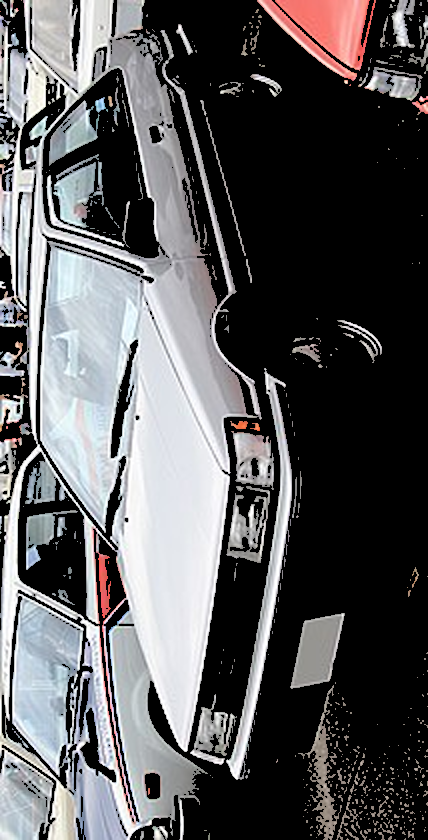

In [52]:
!pip install opencv-python-headless # installing opencv library

import cv2
import requests
from io import BytesIO
import numpy as np

# Load the image from the URL
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/1983_Toyota_Corolla_Levin.jpg/420px-1983_Toyota_Corolla_Levin.jpg"
response = requests.get(url)
image = cv2.imdecode(np.frombuffer(response.content, np.uint8), cv2.IMREAD_UNCHANGED)


# Double the size of the image
enlarged_image = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

# Transpose the image 90 degrees
transposed_image = cv2.transpose(enlarged_image)

# Background removal using OpenCV (simple thresholding for this example)
# This approach might need adjustments based on the image content.

# Convert the image to grayscale
gray = cv2.cvtColor(transposed_image, cv2.COLOR_BGR2GRAY)

# Threshold the image to create a mask
_, mask = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Apply the mask to extract the foreground (character)
foreground = cv2.bitwise_and(transposed_image, transposed_image, mask=mask)

# Display the image
# (In Colab, you'll see the output directly)
from google.colab.patches import cv2_imshow
cv2_imshow(foreground) # Display the foreground